In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import filters
from skimage import measure, color, io


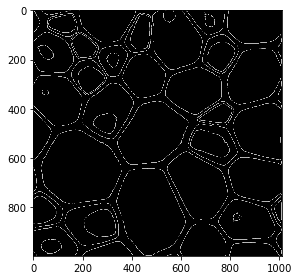

In [21]:
img1 = cv2.imread ("grains4.jpg")
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold (img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
edge_sobel = filters.sobel(thresh)
io.imshow(edge_sobel,cmap=plt.cm.gray)
#mask2 = edges2== 0 
#ret, thresh = cv2.threshold (edge_sobel, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
pixels_to_um = 0.5 # (1 px = 500 nm)



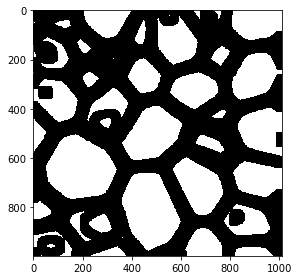

In [22]:
kernel = np.ones ((3,3), np.uint8)
eroded = cv2.erode(edge_sobel,kernel, iterations = 1)
dilated = cv2.dilate (edge_sobel, kernel, iterations = 15)
mask = dilated==0
io.imshow(mask)



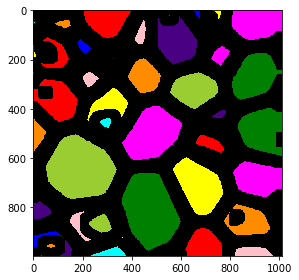

In [23]:
s = [[1,1,1], [1,1,1], [1,1,1]]
labeled_mask, num_label =  ndimage.label(mask, structure=s)
num_label
img2 = color.label2rgb(labeled_mask, bg_label = 0)
io.imshow(img2)

In [24]:
clusters = measure.regionprops(labeled_mask, img)  #send in original image for Intensity measurements
propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    
    

output_file = open('image_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n') #join strings in array by commas, leave first cell blank
#First cell blank to leave room for header (column names)

for cluster_props in clusters:
    #output cluster properties to the excel file
    output_file.write(str(cluster_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = cluster_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = cluster_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = cluster_props[prop]*pixels_to_um
        else: 
            to_print = cluster_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')
output_file.close()   #Closes the file, otherwise it would be read only. 


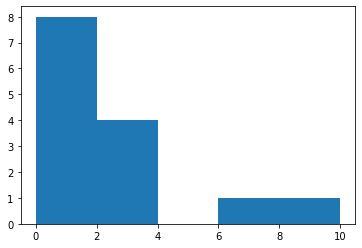

In [25]:
import pandas as pd
colnames = ['Area','equivalent_diameter','orientation','MajorAxisLength','MinorAxisLength','Perimeter','MinIntensity','MeanIntensity','MaxIntensity']
df = pd.read_csv('image_measurements.csv', header=0, sep=',')
df
plt.hist(df.Area, bins=5,range=[0,10])  
plt.show()